In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc
import squarify
import pyodbc
import glob
import math
from sklearn.linear_model import LinearRegression #mô hình hồi quy tuyến tính
import statistics as sta
print('Completed import lib')

Completed import lib


# Xử lý data

In [2]:
# customer_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='customer info')
# items_data = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Items')
# customer_transactions = pd.read_excel('D:/Mindx-Career-Kick-start/DA_TEST_1(test2)/customers_data.xlsx',sheet_name='Customer transactions')

customer_data = pd.read_excel('customers_data.xlsx',sheet_name='customer info')
items_data = pd.read_excel('customers_data.xlsx',sheet_name='Items')
customer_transactions = pd.read_excel('customers_data.xlsx',sheet_name='Customer transactions')

In [3]:
os.chdir('../DA_TEST_1(test2)/Traffic')

extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
traffic_data = pd.concat([pd.read_excel(f) for f in all_filenames ])
traffic_data

,Page URL,users,uniquePageviews,pageviews,Brand,Posted On (DD/MM/YYYY)
0,/2020/1/032irview0.686128260621012,5669.2,5777.8,6286.4,"Ki)D3jDmA,RIP68X",2020-01-10 16:56:13
1,/2020/1/070ttream0.518887735674677,359.8,370.4,403.4,GO4582ey<S!+k1VE,2020-01-10 05:04:35
2,/2020/1/070htream0.333307794468401,587.6,614.2,657.6,G.Kb^jz*soY!(-4Q,2020-01-16 23:27:08
3,/2020/1/100Grseys0.271522111052549,1284.0,1308.6,1385.4,Dr|vm[-5p~56Y\mk,2020-01-17 12:32:24
4,/2020/1/100[nside0.645837365801341,1846.0,1880.8,2025.0,Dr|vm[-5p~56Y\mk,2020-01-23 05:21:08
...,...,...,...,...,...,...
461,/2020/12/yinfbowls0.6558670149224,130.0,133.2,142.2,HoXbja)_x007f_qT:ESE8#,2020-12-01 04:55:35
462,/2020/12/yosolease0.0455049365834417,314.6,325.6,365.2,"YoRQW7@*&5W+~4Y""",2020-12-03 15:25:00
463,/2020/12/you^-info0.127669879156147,1419.6,1448.4,1615.8,"MouDd/fn,XEARhBp",2020-12-06 23:57:54
464,/2020/12/youe-info0.729842478879044,483.8,487.6,509.6,"yo4}AUKGso=,?!DX",2020-12-04 05:59:22


In [4]:
customer_data

,ID,FirstName,LastName,Country,DateJoined,Gender,Birthday,Newsletter
0,0.0,V0.296680287495188,L0.104646531512644,FR - France,2015-12-18,NaN,1968-02-03,N
1,1.0,D0.793097101838541,Law0.141693355411763,GER - Germany,2015-12-21,M,2009-10-06,Y
2,2.0,Ker0.141418247925814,Ng0.753960335680345,FR - France,2015-12-22,F,1990-08-04,Y
3,3.0,Fik0.950054552966336,F0.590961171612745,UK - United Kingdom,2015-12-22,M,1974-07-24,N
4,4.0,Iona0.294287981536498,Ison0.826191754811968,IT - Italy,2015-12-22,M,1981-08-13,N
...,...,...,...,...,...,...,...,...
765,765.0,Ya0.945566148422846,Lo0.214781069325519,GER - Germany,2016-09-05,F,1989-10-25,N
766,766.0,Yoo0.331072249620266,Low0.870500054610635,GER - Germany,2016-09-05,NaN,1965-07-25,Y
767,767.0,Za0.957577858135873,Thoma0.729674423009536,GER - Germany,2016-09-05,M,1980-11-07,Y
768,768.0,Y0.286774649994125,Aung0.752567424443609,GER - Germany,2016-09-05,M,1980-09-17,Y


In [5]:
items_data

,ItemID,Product,Brand,SellPrice,CostPrice
0,1.0,032irview0.686128260621012,"Ki)D3jDmA,RIP68X",943.0,359.0
1,2.0,070ttream0.518887735674677,GO4582ey<S!+k1VE,717.0,207.0
2,3.0,070htream0.333307794468401,G.Kb^jz*soY!(-4Q,739.0,199.0
3,4.0,100Grseys0.271522111052549,Dr|vm[-5p~56Y\mk,532.0,262.0
4,5.0,100[nside0.645837365801341,Dr|vm[-5p~56Y\mk,593.0,392.0
...,...,...,...,...,...
17884,17885.0,zarzmodel0.705343660670698,"Zah<@kD,N[_x007f_Vo]vf",202.0,42.0
17885,17886.0,zelQailer0.599088919243258,Nia_TfHUVDtT>6-s,463.0,131.0
17886,17887.0,zenyation0.980382120595891,Chbm3nL;wgcU<S(y,688.0,200.0
17887,17888.0,zenvition0.646980947183814,"Ac8IJsKH,4xtY.Tk",157.0,63.0


In [6]:
customer_transactions

,OrderID,CustomerID,ItemID,TransactionDate,Channel
0,0.0,0.0,352.0,2020-03-21,In Store
1,0.0,0.0,3433.0,2020-07-14,In Store
2,0.0,0.0,11162.0,2020-08-09,In Store
3,0.0,0.0,13011.0,2020-12-07,In Store
4,0.0,0.0,13885.0,2020-11-08,In Store
...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store
25209,8361.0,769.0,13162.0,2020-02-04,In Store
25210,8362.0,769.0,8727.0,2020-11-18,In Store
25211,8362.0,769.0,13065.0,2020-05-11,In Store


In [7]:
sell = pd.merge(customer_transactions, items_data[['ItemID','Brand','SellPrice','CostPrice']], on='ItemID',how='left')
sell['month'] = pd.DatetimeIndex(sell['TransactionDate']).month
sell['year'] = pd.DatetimeIndex(sell['TransactionDate']).year
sell


,OrderID,CustomerID,ItemID,TransactionDate,Channel,Brand,SellPrice,CostPrice,month,year
0,0.0,0.0,352.0,2020-03-21,In Store,"MouDd/fn,XEARhBp",735.0,426.0,3,2020
1,0.0,0.0,3433.0,2020-07-14,In Store,"muy(D#""d02`vwt_^",963.0,491.0,7,2020
2,0.0,0.0,11162.0,2020-08-09,In Store,Wem+H2Pk8Jfbb*[D,582.0,391.0,8,2020
3,0.0,0.0,13011.0,2020-12-07,In Store,ThcmX`v~{K~t{Jeh,339.0,135.0,12,2020
4,0.0,0.0,13885.0,2020-11-08,In Store,Ka53T<K8f.2M94Yd,1369.0,231.0,11,2020
...,...,...,...,...,...,...,...,...,...,...
25208,8361.0,769.0,10053.0,2020-12-19,In Store,"Ac8IJsKH,4xtY.Tk",1077.0,242.0,12,2020
25209,8361.0,769.0,13162.0,2020-02-04,In Store,"Ince!T,;eW/4o\eg",1140.0,253.0,2,2020
25210,8362.0,769.0,8727.0,2020-11-18,In Store,WaQqK)2JxI(=dac=,205.0,66.0,11,2020
25211,8362.0,769.0,13065.0,2020-05-11,In Store,"Uny~Y,~<rTC^J6py",1012.0,272.0,5,2020


# 1.	Website traffic có ảnh hưởng đến doanh thu không ?

In [8]:
revenus_year = sell.groupby('Channel')[['SellPrice']].sum()
revenus_year.loc['Column_Total']= revenus_year.sum(numeric_only=True, axis=0)
revenus_year.reset_index(inplace=True)
revenus_year['change%'] = (revenus_year['SellPrice']/int(revenus_year['SellPrice'].iloc[2:3]))*100
revenus_year

,Channel,SellPrice,change%
0,In Store,10222263.0,50.066875
1,Online,10194955.0,49.933125
2,Column_Total,20417218.0,100.000000


<AxesSubplot:xlabel='Channel', ylabel='change%'>

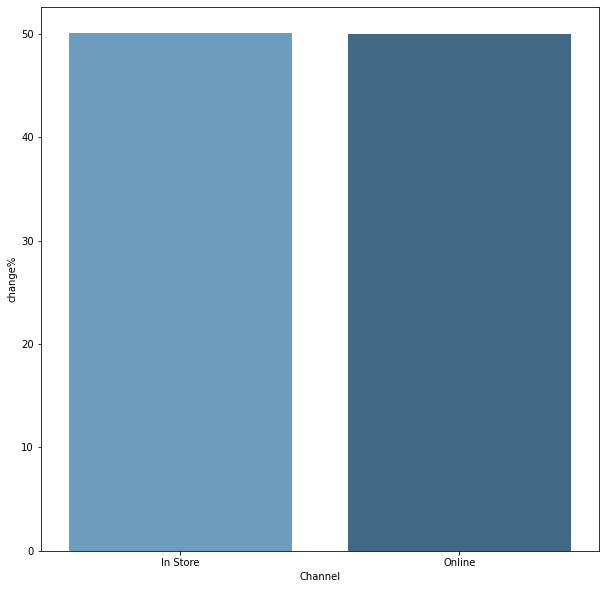

In [9]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x='Channel', y='change%', data=revenus_year.loc[revenus_year['Channel'] != 'Column_Total'],palette="Blues_d")

Tại năm 2020 doanh thu từ bán hàng online chiếm 49.9% tổng doanh thu của nhãn hàng, cho thấy doanh thu từ bán hàng online có sự ảnh hưởng rất lớn đến doanh nghiệp

In [10]:
sell_month = sell.copy()
revenus_month = sell_month.groupby(['Channel','month'])[['SellPrice']].sum()
revenus_month.reset_index(inplace=True)
revenus_month

,Channel,month,SellPrice
0,In Store,1,832491.0
1,In Store,2,818208.0
2,In Store,3,847625.0
3,In Store,4,877582.0
4,In Store,5,839278.0
5,In Store,6,873757.0
6,In Store,7,851370.0
7,In Store,8,856549.0
8,In Store,9,874165.0
9,In Store,10,817780.0


<AxesSubplot:xlabel='month', ylabel='SellPrice'>

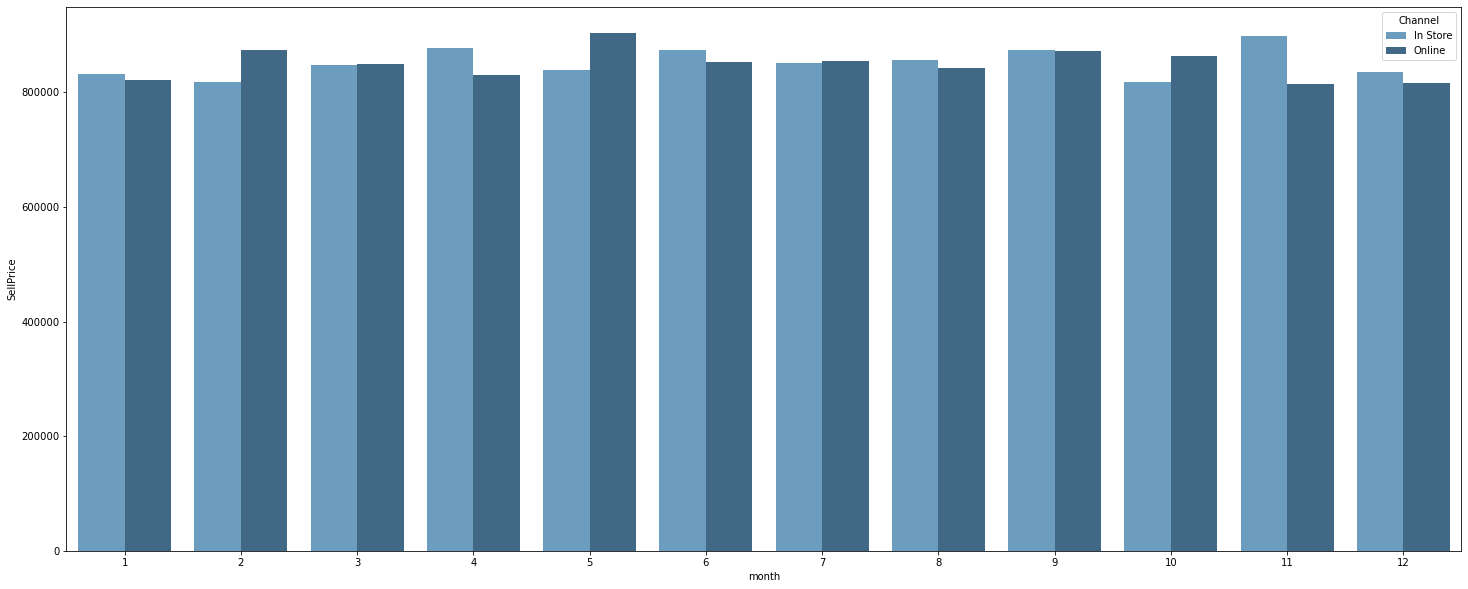

In [11]:
fig = plt.figure(figsize=(25,10))
sns.barplot(x='month', y='SellPrice', data=revenus_month,hue='Channel',palette="Blues_d")

Doanh thu trung bình từ bán hàng truyền thống cao hơn doanh thu từ bán hàng online vào thời gian nghỉ lễ cuối và đầu năm. Giai đoạn giữa năm doanh thu trung bình không chênh lệch quá nhiều.

# 2.	Sản phẩm nào mang lại pageviews và doanh thu

In [20]:
items_view = traffic_data.groupby(['Brand'])[['pageviews','uniquePageviews']].sum()
items_view.reset_index(inplace=True)
items_view

,Brand,pageviews,uniquePageviews
0,!lMifo~0~N65rM}2,102.0,94.8
1,#B_-`aDe`}CVt'!A,57717.0,54106.0
2,#F5)UtM8Y&|njdBq,469.6,427.0
3,$UYTzcYl\*I(\/SZ,1602.2,1494.2
4,"(Ah/=SM""p^hD')i?",508.8,465.4
...,...,...,...
3350,wicqp`l8l$:^}e:,91.4,83.0
3351,"yo4}AUKGso=,?!DX",19780.6,18627.8
3352,"ze\yQP9Ju,s(O|>]",366.2,338.8
3353,Ét2:1))2]qB2`9;^,1914.0,1766.4


In [21]:
items_res = sell.groupby(['Brand'])[['SellPrice']].sum()
items_res.reset_index(inplace=True)
items_res = pd.merge(items_res,items_view,on='Brand',how='left')
items_res
items_res

,Brand,SellPrice,pageviews,uniquePageviews
0,!lMifo~0~N65rM}2,2715.0,102.0,94.8
1,#B_-`aDe`}CVt'!A,85066.0,57717.0,54106.0
2,$UYTzcYl\*I(\/SZ,1272.0,1602.2,1494.2
3,"03%@8(c""v>iM'v1A",5559.0,1700.4,1571.2
4,"08-AQ3_x007f_,j-0gQHk%",278.0,NaN,NaN
...,...,...,...,...
2785,wi9@xU3I$YhPw^~T,3444.0,1902.8,1759.8
2786,wicqp`l8l$:_x007f_^}e:,806.0,NaN,NaN
2787,"yo4}AUKGso=,?!DX",14746.0,19780.6,18627.8
2788,"ze\yQP9Ju,s(O|>]",8564.0,366.2,338.8


In [23]:
items_res.loc[items_res['pageviews'].isnull() == True]

,Brand,SellPrice,pageviews,uniquePageviews
4,"08-AQ3_x007f_,j-0gQHk%",278.0,NaN,NaN
40,A-_x007f_Q.WVjVK=g.%AW,2020.0,NaN,NaN
52,ANT!#x<tWjwK_x007f_uS^,1971.0,NaN,NaN
76,"Ac_x007f_""s%N4s/:V'9J}",791.0,NaN,NaN
78,Acn33(Z%RX@0$/g_x007f_,2624.0,NaN,NaN
...,...,...,...,...
2696,bl.T3_x007f_I&^Ob6eu}^,2018.0,NaN,NaN
2714,fi'/#s=((SFz_x007f_cJ_x007f_,424.0,NaN,NaN
2770,ta+2F`&}Ay_x007f_>}4@d,980.0,NaN,NaN
2771,te*pKo_x007f_1<WpO#*]3,1902.0,NaN,NaN


In [22]:
items_res.isnull().sum()

Brand                0
SellPrice            0
pageviews          212
uniquePageviews    212
dtype: int64

In [13]:
# df.loc['Column_Total']= df.sum(numeric_only=True, axis=0)
# df.loc[:,'Row_Total'] = df.sum(numeric_only=True, axis=1)